In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load dataset
df = pd.read_csv('//content/sales_data.csv')

# Preview the data
print(df.head())


   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     Sales            City  Hour  
0  1700.00   New York City     0  
1   600.00   New

In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/sales_data.csv')

# Check for missing values
print(df.isnull().sum())

# Fill missing values in 'Price Each' column with the mean
price_column = 'Price Each'
df[price_column].fillna(df[price_column].mean(), inplace=True)

# Drop rows with missing 'Product' or 'City' values
df.dropna(subset=['Product', 'City'], inplace=True)

# Verify changes
print(df.isnull().sum())


Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64
Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64


<ipython-input-7-cffb9c164ce1>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[price_column].fillna(df[price_column].mean(), inplace=True)


In [8]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/sales_data.csv')

# Check for missing values
print(df.isnull().sum())

# Fill missing values in 'Price Each' column with the mean
price_column = 'Price Each'
df[price_column].fillna(df[price_column].mean(), inplace=True)

# Drop rows with missing 'Product' or 'City' values
df.dropna(subset=['Product', 'City'], inplace=True)

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Verify changes
print(df.isnull().sum())
print(df.dtypes)


Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64


<ipython-input-8-918f3bcfd4d8>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[price_column].fillna(df[price_column].mean(), inplace=True)


Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64
Unnamed: 0                   int64
Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Sales                      float64
City                        object
Hour                         int64
dtype: object


In [9]:
# Summary statistics
print(df.describe())


          Unnamed: 0       Order ID  Quantity Ordered     Price Each  \
count  185950.000000  185950.000000     185950.000000  185950.000000   
mean     8340.388475  230417.569379          1.124383     184.399735   
min         0.000000  141234.000000          1.000000       2.990000   
25%      3894.000000  185831.250000          1.000000      11.950000   
50%      7786.000000  230367.500000          1.000000      14.950000   
75%     11872.000000  275035.750000          1.000000     150.000000   
max     25116.000000  319670.000000          9.000000    1700.000000   
std      5450.554093   51512.737110          0.442793     332.731330   

                          Order Date          Month          Sales  \
count                         185950  185950.000000  185950.000000   
mean   2019-07-18 21:54:38.887550464       7.059140     185.490917   
min              2019-01-01 03:07:00       1.000000       2.990000   
25%              2019-04-16 21:05:15       4.000000      11.950000   
5

In [11]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/sales_data.csv')

# Calculate Revenue
df['Revenue'] = df['Quantity Ordered'] * df['Price Each']

# Group by 'Product' and sum the 'Revenue'
product_revenue = df.groupby('Product')['Revenue'].sum().reset_index()

# Sort values by revenue
product_revenue = product_revenue.sort_values(by='Revenue', ascending=False)

# Display top-selling products by revenue
print(product_revenue)


                       Product     Revenue
13          Macbook Pro Laptop  8037600.00
18                      iPhone  4794300.00
14             ThinkPad Laptop  4129958.70
9                 Google Phone  3319200.00
1       27in 4K Gaming Monitor  2435097.56
3       34in Ultrawide Monitor  2355558.01
6     Apple Airpods Headphones  2349150.00
8                Flatscreen TV  1445700.00
7   Bose SoundSport Headphones  1345565.43
2             27in FHD Monitor  1132424.50
16             Vareebadd Phone   827200.00
0                 20in Monitor   454148.71
11          LG Washing Machine   399600.00
10                    LG Dryer   387600.00
12    Lightning Charging Cable   347094.15
15        USB-C Charging Cable   286501.25
17            Wired Headphones   246478.43
4        AA Batteries (4-pack)   106118.40
5       AAA Batteries (4-pack)    92740.83


In [13]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/sales_data.csv')

# Group by 'City' and sum 'Quantity Ordered'
city_sales = df.groupby('City')['Quantity Ordered'].sum().reset_index()

# Display city sales
print(city_sales)


             City  Quantity Ordered
0         Atlanta             16602
1          Austin             11153
2          Boston             22528
3          Dallas             16730
4     Los Angeles             33289
5   New York City             27932
6        Portland             14053
7   San Francisco             50239
8         Seattle             16553


<ipython-input-14-45c08063bfa9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product', y='Revenue', data=product_revenue, palette='viridis')


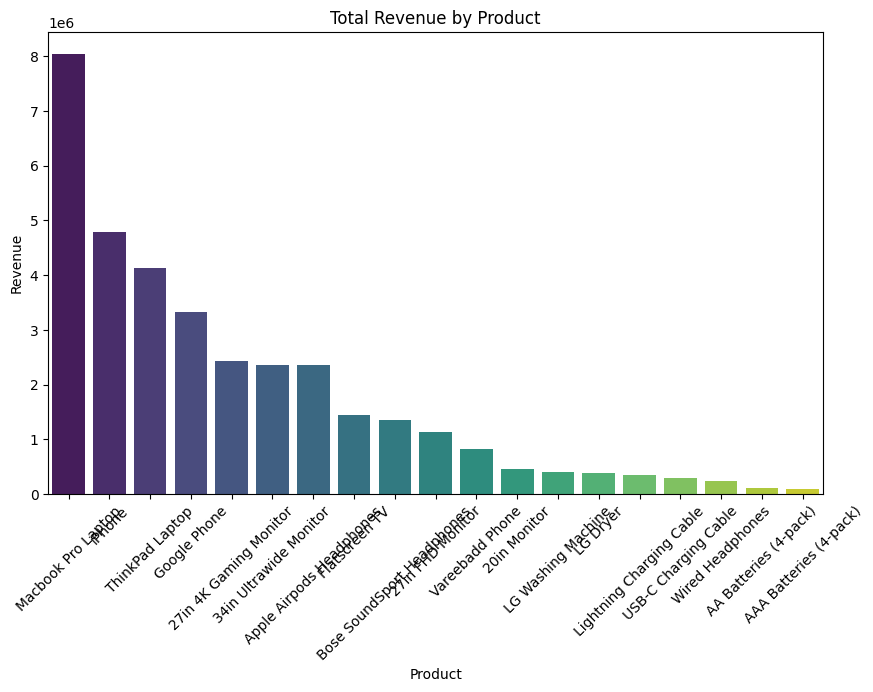

In [14]:
# Bar plot of total revenue by product
plt.figure(figsize=(10,6))
sns.barplot(x='Product', y='Revenue', data=product_revenue, palette='viridis')
plt.title('Total Revenue by Product')
plt.xticks(rotation=45)
plt.show()


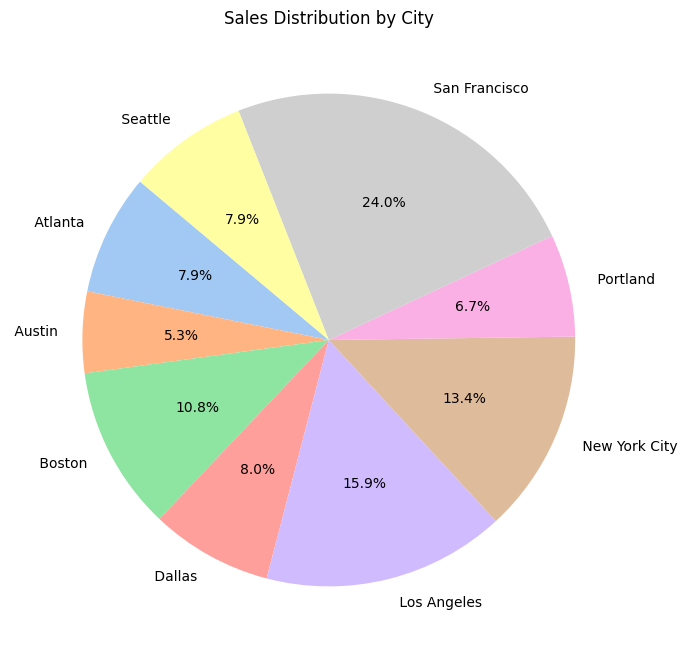

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pie chart for city sales
plt.figure(figsize=(8,8))
plt.pie(city_sales['Quantity Ordered'], labels=city_sales['City'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by City')
plt.show()


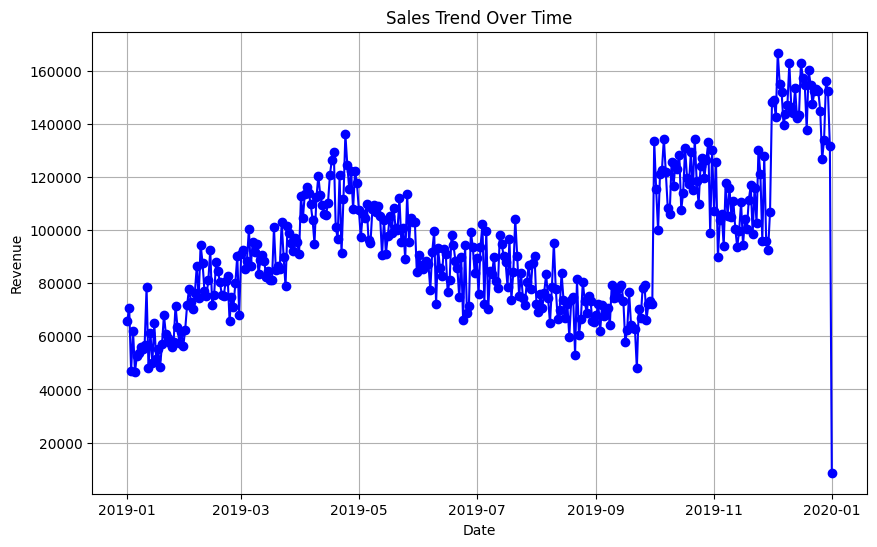

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('sales_data.csv')

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Drop rows with missing values in 'Order Date'
df.dropna(subset=['Order Date'], inplace=True)

# Calculate Revenue if not done previously
df['Revenue'] = df['Quantity Ordered'] * df['Price Each']

# Group by 'Order Date' and sum the 'Revenue'
daily_sales = df.groupby(df['Order Date'].dt.date)['Revenue'].sum().reset_index()
daily_sales.columns = ['Date', 'Revenue']

# Plotting sales trend
plt.figure(figsize=(10,6))
plt.plot(daily_sales['Date'], daily_sales['Revenue'], color='blue', marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


In [19]:
# Save cleaned dataset
df.to_csv('cleaned_sales_data.csv', index=False)
